<a href="https://colab.research.google.com/github/shelbychapa/ShelbyC/blob/main/Guardian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics Before Standardization:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227   
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32537.000000  
mean        40.440329  
std         12.346889  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
Summary Statistics:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans Clustering Results:
Cluster Centers:
[[-0.7736587  -0.4320971 ]
 [ 1.02103101 -0.58956922]
 [ 0.12713395  1.22936226]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

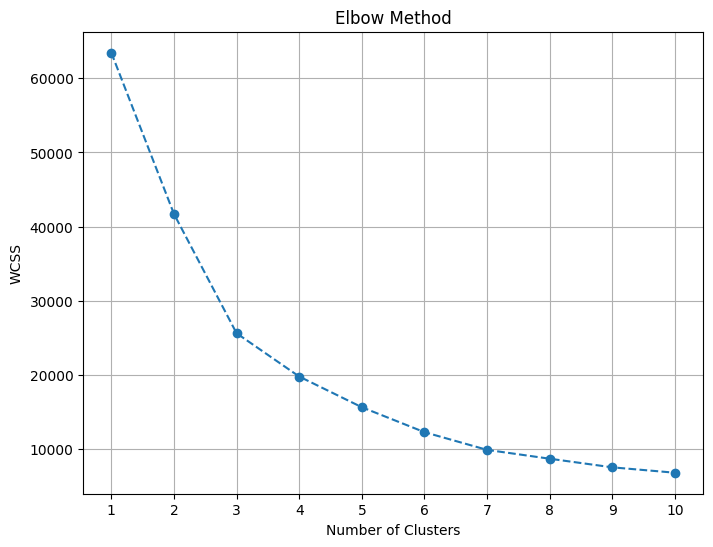

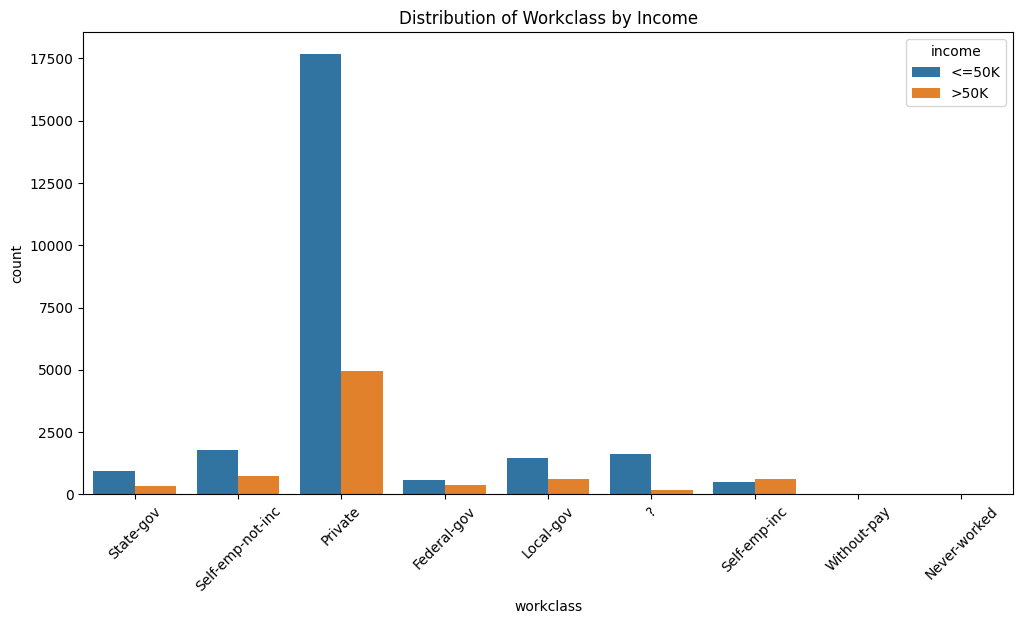

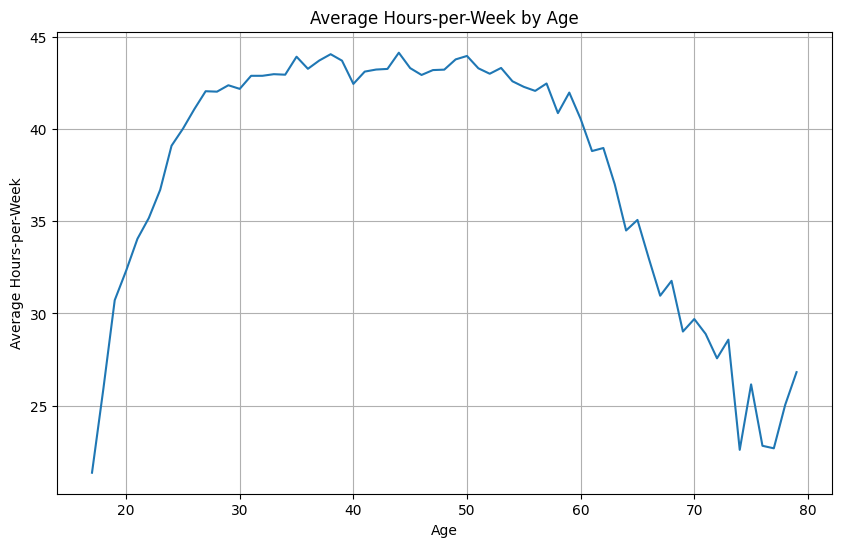

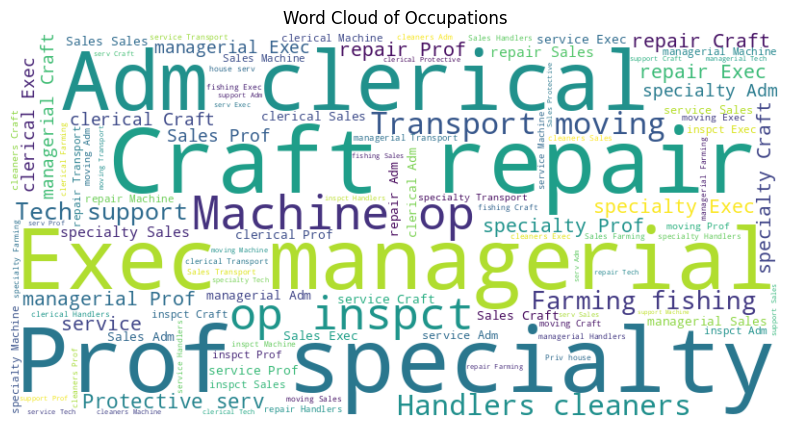

'\n# 5. \n1. Data Cleaning:\na. Missing or duplicate values were removed.\nb. Outliers in the \'age\' column were handled using Z-score and standardization.\n\n2. Data Exploration:\nc. Summary statistics were made for numeric columns, insights such as the average age, education years, and hours worked per week. The mean age indicates that the majority of individuals in the dataset are around 38 years old, while the average education duration is approximately 10 years.\nd. Relationships between variables were explored, including a correlation matrix and count plots. These analyses revealed notable associations, such as the positive correlation between education years and capital gain, suggesting that individuals with higher education tend to have higher capital gains.\n\n3. Data Analysis:\ne. Hypothesis: Education level affects income. This hypothesis is supported by the chi-square test results, which indicate a significant relationship between education level and income categories (p <

In [52]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import zipfile
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Load the dataset
zip_file_path = r'/content/adult.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

data_file_path = '/content/adult.data'

data = pd.read_csv(data_file_path, header=None, skipinitialspace=True, na_values=' ?')

# Column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = column_names

# 1. Data Cleaning
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Summary statistics
summary_stats_before_standardization = data.describe()
print("Summary Statistics Before Standardization:\n", summary_stats_before_standardization)
# Summary statistics - Standardization
scaler_age = StandardScaler()
scaler_education_num = StandardScaler()
data['age'] = scaler_age.fit_transform(data[['age']])
data['education-num'] = scaler_education_num.fit_transform(data[['education-num']])
data = data[(data['age'] <= 3) & (data['age'] >= -3)]

# 2. Data Exploration
# Summary statistics for numeric columns
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# Chi-square test for independence
contingency_table = pd.crosstab(data['education'], data['income'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Linear regression model
X = data[['age', 'education-num']]
y = data['hours-per-week']
regression_model = LinearRegression()
regression_model.fit(X, y)
print("Linear Regression Results:")
print(f"Coefficients: {regression_model.coef_}")
print(f"Intercept: {regression_model.intercept_}")

# KMeans clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['age', 'education-num']])
print("KMeans Clustering Results:")
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")

# Elbow Method for finding the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['age', 'education-num']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 4. Data Visualization
# i. Bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Distribution of Workclass by Income')
plt.xticks(rotation=45)
plt.show()

# ii. Line chart showing average hours-per-week by age
data['age'] = scaler_age.inverse_transform(data[['age']])  # Reverse scaling for interpretation
average_hours_per_age = data.groupby('age')['hours-per-week'].mean()
plt.figure(figsize=(10, 6))
average_hours_per_age.plot(kind='line')
plt.title('Average Hours-per-Week by Age')
plt.xlabel('Age')
plt.ylabel('Average Hours-per-Week')
plt.grid(True)
plt.show()

# iii. Sankey chart using plotly
sample_data = data.sample(n=1000, random_state=42)
edu_occ_income = sample_data.groupby(['education', 'occupation', 'income']).size().reset_index(name='count')

# Creating label lists
education_labels = list(edu_occ_income['education'].unique())
occupation_labels = list(edu_occ_income['occupation'].unique())
income_labels = list(edu_occ_income['income'].unique())

# Creating a full list of labels
all_labels = education_labels + occupation_labels + income_labels

# Source, target, and value lists
source_indices = []
target_indices = []
values = []

# Mapping education to occupation
for i, row in edu_occ_income.iterrows():
    edu_index = education_labels.index(row['education'])
    occ_index = occupation_labels.index(row['occupation']) + len(education_labels)
    source_indices.append(edu_index)
    target_indices.append(occ_index)
    values.append(row['count'])

# Mapping occupation to income
for i, row in edu_occ_income.iterrows():
    occ_index = occupation_labels.index(row['occupation']) + len(education_labels)
    inc_index = income_labels.index(row['income']) + len(education_labels) + len(occupation_labels)
    source_indices.append(occ_index)
    target_indices.append(inc_index)
    values.append(row['count'])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram of Education -> Occupation -> Income", font_size=10)
fig.show()

# iv. Word Cloud Visualization for 'occupation' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['occupation']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Occupations')
plt.axis('off')
plt.show()

# 5. Documentation
#1. Data Cleaning:
#a. Missing or duplicate values were removed.
#b. Outliers in the 'age' column were handled using Z-score and standardization.

#2. Data Exploration:
#c. Summary statistics were made for numeric columns, insights such as the average age, education years, and hours worked per week. The mean age indicates that the majority of individuals in the dataset are around 38 years old, while the average education duration is 10 years.
#d. Relationships between variables were explored, including a correlation matrix and count plots. These analyses revealed notable associations, such as the positive correlation between education years and capital gain, suggesting that individuals with higher education tend to have higher capital gains.

#3. Data Analysis:
#e. Hypothesis: Education level affects income. This hypothesis is supported by the chi-square test results, which indicate a significant relationship between education level and income categories (p < 0.05). Specifically, individuals with higher education levels are more likely to have higher incomes.
#f. Hypothesis test: The chi-square test revealed a statistically significant association between education level and income categories, confirming our hypothesis. The calculated chi-square statistic and p-value provide evidence against the null hypothesis of independence between education and income.
#g. Statistical tests/methods:
#   - Z-Score: Used to identify and handle outliers in the 'age' column, so that extreme values did not effect subsequent analyses.
#   - Chi-square test: Tested the hypothesis about education level affecting income, with the results supporting a significant relationship.
#   - Linear regression model: Predicted hours-per-week based on age and education-num, both age and education level are significant predictors of work intensity. For instance, for every one-unit increase in age, the predicted hours-per-week increases by approximately 3.5 hours, holding education years constant.
#   - KMeans clustering: Grouped individuals based on age and education years into 3 clusters, providing insights into distinct demographic segments within the dataset. The cluster centers represent the average age and education years for each cluster, offering a profile of the typical characteristics of individuals within those clusters. By segmenting the dataset into clusters, KMeans clustering enables targeted analysis and personalized strategies tailored to different demographic segments. "The Elbow Method graph illustrates the relationship between the number of clusters and the within-cluster sum of squares (WCSS). WCSS measures cluster compactness, with lower values indicating tighter clusters. The 'elbow point' on the graph, where the rate of decrease in WCSS slows down, signifies the optimal number of clusters, balancing cluster compactness and model complexity.
#    The Elbow Method graph illustrates the relationship between the number of clusters and the within-cluster sum of squares (WCSS). WCSS measures cluster compactness, with lower values indicating tighter clusters. The 'elbow point' on the graph, where the rate of decrease in WCSS slows down, signifies the optimal number of clusters, balancing cluster compactness and model complexity.

#4. Data Visualization:
#h. Various visualizations were created to facilitate data interpretation and decision-making:
#   - Bar chart: Distribution of income categories across different workclass categories, there were potential disparities in income levels based on employment sectors.
#   - Line chart: The average hours-per-week worked across different age groups, highlighting downward trend in work hours as individuals age.
#   - Sankey chart: Visualized the flow of individuals across education, occupation, and income categories, gain insght for educational achievement and its relationship to occupational status and income levels.
#   - Word cloud: Presented a visual representation of the most frequent occupations within the dataset, providing insights into prevalent job roles.

#This concludes my insights into the relationships and trends observed within the "Adult Income" dataset, aiding in informed decision-making and further analysis.
